### Task 17 - Practical Task 2

This task aims to predict a person’s progression in the diabetes condition with respect to various attributes about them captured as observations in a CSV file.

In [77]:
# Import all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Now load the given diabetes_dirty csv file into a dataframe

In [78]:
# Read and load the diabetes file
df = pd.read_csv("diabetes_dirty.csv")

In [79]:
# Display few sample observations to verify the data in dataframe
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [80]:
# Check the shape of the dataframe
df.shape

(442, 11)

Now we have to find which features are important to determine the target outcome. For this first we will take a look at heatmap and then we have to find the correlation of all features in the dataframe except the target label 'PROGRESSION'.

<Axes: >

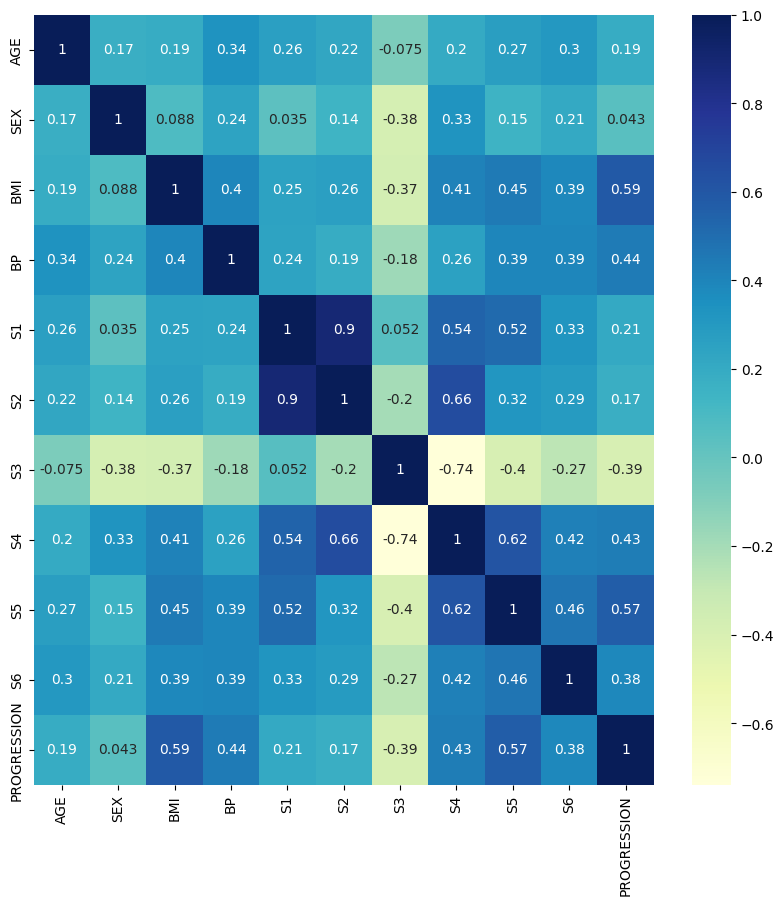

In [81]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')


Now we will take a look at correlation by sorting by target variable

<Axes: >

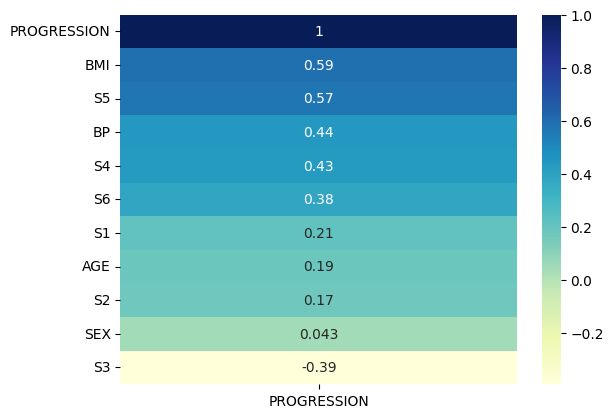

In [82]:
corr = df.corr()[['PROGRESSION']].sort_values(by = 'PROGRESSION', ascending = False)
sns.heatmap(corr, annot=True, cmap='YlGnBu')

From the above heatmap, we see BMI and S5 have high correlation with the target label. So, we will consider these two features as X values/independent variables. 

Note - We didnt consider other independent variables such as BP and S4 as they dont have much correlation as well as there should little or no multicollinearity of indepenedent variables in Muliple linear regression

In [83]:
# Create a new dataframe with the required independent variables and target variable
df_new = df[['BMI','S5', 'PROGRESSION']]

In [84]:
# Verify few observations in the new dataframe
df_new.head()

,BMI,S5,PROGRESSION
0,32.1,4.8598,151
1,21.6,3.8918,75
2,30.5,4.6728,141
3,25.3,4.8903,206
4,23.0,4.2905,135


In [85]:
# Check the shape of the new dataframe
df_new.shape

(442, 3)

In [86]:
# Create X and y for MLR
X = df_new.drop("PROGRESSION", axis =1)
y = df[["PROGRESSION"]]

<Axes: >

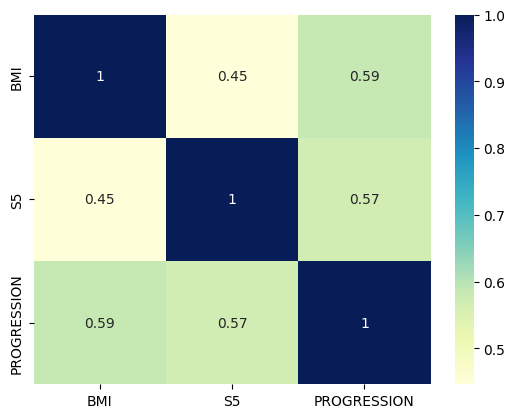

In [87]:
# Just check the correlation for the new dataframe
sns.heatmap(df_new.corr(), annot=True,cmap='YlGnBu')

array([[<Axes: title={'center': 'BMI'}>, <Axes: title={'center': 'S5'}>],
       [<Axes: title={'center': 'PROGRESSION'}>, <Axes: >]], dtype=object)

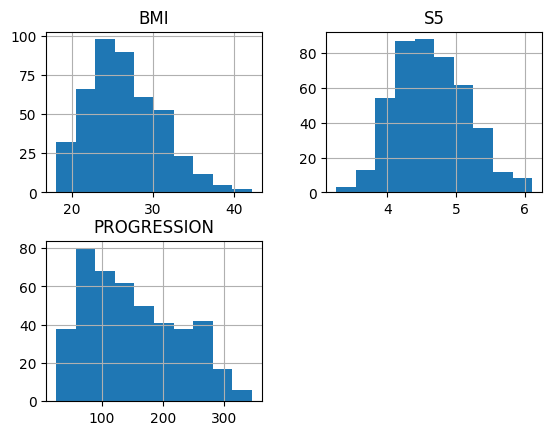

In [88]:
# Check the histogram to see the distribution of data
df_new.hist()

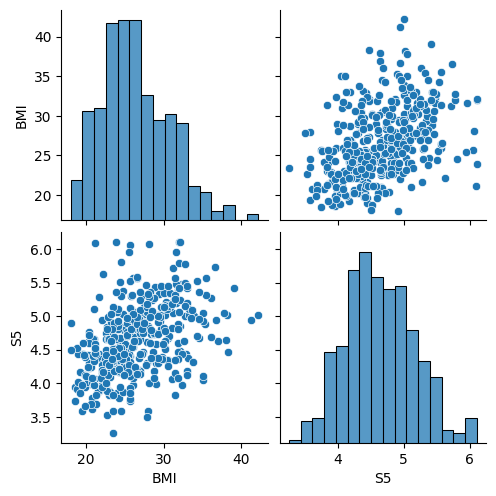

In [89]:
# Plot the distribution of the data
sns.pairplot(data=df_new.drop('PROGRESSION', axis=1))

As seen above the distribution of data doesn't follow Gaussian distribution, so we will use MinxMax scaler for feature scaling

# Train Test Split

In [90]:
# Generate training and test sets comprising 80% and 20% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [91]:
# Check the shape of the X and y (for both train and test data)
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (353, 2)
X_test: (89, 2)
Y_train: (353, 1)
Y_test: (89, 1)


## Feature scaling

As the distribution of data doesn't follow Gaussian distribution, so we will use MinxMax scaler for feature scaling to rescale the values between 0 and 1

In [92]:
# Fit the scaler on train data
sc = MinMaxScaler()
sc.fit(X_train)

# Apply the scaler on train and test data
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


Import Multiple Linear Regression Model

In [93]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [94]:
# Do a prediction for test set
y_pred=linreg.predict(X_test)


Now display the Intercept and Coefficients

In [95]:
print ('Intercept: ',linreg.intercept_)    
print ('Coefficients: ', linreg.coef_[0])

Intercept:  [15.58472208]
Coefficients:  [183.06561865 146.00708431]


Compute R-squared for the model to check the performance and print the value

In [96]:
r2 = r2_score(y_test,y_pred) * 100
print('R-squared: ', r2)

R-squared:  45.22925957397932


Text(0.5, 1.0, 'Actual vs. Predicted')

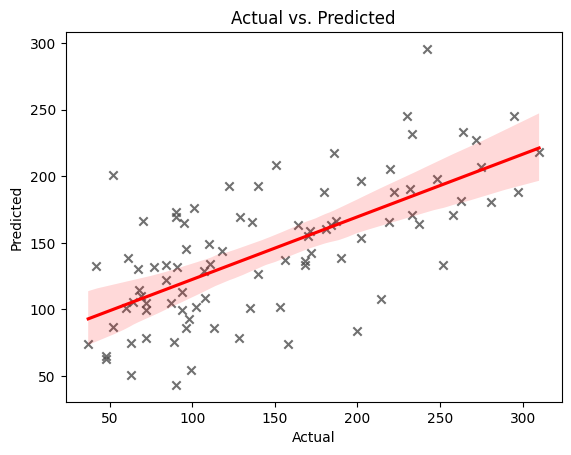

In [98]:
# Plotting the actual vs predicted values
# plt.scatter(y_test, y_pred)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
sns.regplot(x = y_test,y = y_pred,ci=99, marker="x", color=".3", line_kws=dict(color="r"))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')